# IPL Explarotary Data Analysis



In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.2 MB/s 


In [6]:
pip install opendatasets --upgrade --quiet

In [2]:
import jovian

Import Relevant Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

Download the data

In [8]:
file_url = 'https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set'

In [9]:
od.download(file_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohitkmr95
Your Kaggle Key: ··········


100%|██████████| 1.24M/1.24M [00:00<00:00, 81.7MB/s]

Loading data into Pandas

In [12]:
players = pd.read_excel('/content/ipl-data-set/Players.xlsx')
deliveries = pd.read_csv('/content/ipl-data-set/deliveries.csv')
matches = pd.read_csv('/content/ipl-data-set/matches.csv')
mrst = pd.read_csv('/content/ipl-data-set/most_runs_average_strikerate.csv')
teams = pd.read_csv('/content/ipl-data-set/teams.csv')
team_home_away = pd.read_csv('/content/ipl-data-set/teamwise_home_and_away.csv')

Viewing Data

## Players Table

In [112]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
 5   Age            471 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 26.7+ KB


Missing Values

In [113]:
percent_missing = players.isnull().sum() * 100 / len(players)

In [114]:
print(percent_missing)

Player_Name       0.000000
DOB              16.784452
Batting_Hand      0.530035
Bowling_Skill    11.307420
Country          16.784452
Age              16.784452
dtype: float64


In [115]:
players.head(15)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Age
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,31.0
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,39.0
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,45.0
3,A Choudhary,NaT,Right_Hand,Left-arm fast-medium,NaN,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN,NaN
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England,45.0
6,A Hales,NaT,Right_Hand,NaN,NaN,NaN
7,A Joseph,NaT,Right_Hand,Right-arm fast,NaN,NaN
8,A Kumble,1970-10-17,Right_Hand,Legbreak googly,India,52.0
9,A Mishra,1982-11-24,Right_Hand,Legbreak,India,40.0


Cheking for unique values

In [116]:
players['Country'].unique()

array(['India', nan, 'England', 'South Africa', 'Australia', 'Bangladesh',
       'Sri Lanka', 'West Indies', 'New Zealand', 'Pakistan',
       'Netherlands', 'Zimbabwea'], dtype=object)

Cheking in Columns using filter

In [117]:
players.loc[players['Country'] == 'Zimbabwea']

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Age
422,RW Price,1976-06-12,Right_Hand,Slow left-arm orthodox,Zimbabwea,46.0
516,T Taibu,1983-05-14,Right_Hand,Right-arm medium,Zimbabwea,39.0


In [118]:
players['Country'].value_counts()

India           264
Australia        72
South Africa     39
New Zealand      22
Sri Lanka        20
West Indies      19
England          14
Pakistan         13
Bangladesh        5
Zimbabwea         2
Netherlands       1
Name: Country, dtype: int64

Players from each international team

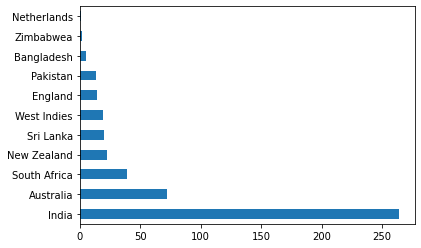

In [119]:
players['Country'].value_counts().plot(kind='barh')

Bowling Skills of Players

In [120]:
players['Bowling_Skill'].head(20)

0           Right-arm medium
1         Right-arm offbreak
2         Right-arm offbreak
3       Left-arm fast-medium
4         Right-arm offbreak
5      Right-arm fast-medium
6                        NaN
7             Right-arm fast
8            Legbreak googly
9                   Legbreak
10          Right-arm medium
11           Legbreak googly
12      Left-arm medium-fast
13     Right-arm fast-medium
14    Slow left-arm orthodox
15     Right-arm medium-fast
16        Right-arm offbreak
17                       NaN
18           Left-arm medium
19           Legbreak googly
Name: Bowling_Skill, dtype: object

In [121]:
players['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', nan, 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler', 'Right-arm Medium',
       'Right-arm Fast'], dtype=object)

In [122]:
players['Bowling_Skill'].value_counts()

Right-arm medium          107
Right-arm offbreak         91
Right-arm fast-medium      68
Slow left-arm orthodox     50
Right-arm fast             39
Right-arm medium-fast      38
Legbreak                   30
Legbreak googly            28
Left-arm fast-medium       19
Left-arm medium            11
Left-arm medium-fast        9
Slow left-arm chinaman      5
Left-arm fast               4
Right-arm bowler            1
Right-arm Medium            1
Right-arm Fast              1
Name: Bowling_Skill, dtype: int64

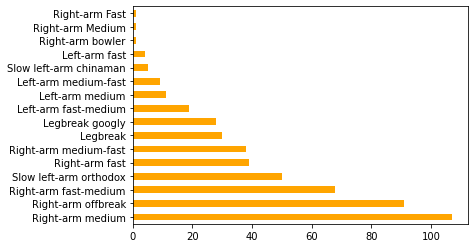

In [123]:
players['Bowling_Skill'].value_counts().plot(kind='barh', color='orange')

Batting Hand of Players

In [124]:
players['Batting_Hand'].unique()

array(['Right_Hand', 'Left_Hand', nan], dtype=object)

In [125]:
players['Batting_Hand'].value_counts()

Right_Hand    421
Left_Hand     142
Name: Batting_Hand, dtype: int64

Handling spelling mistakes

In [126]:
players['Batting_Hand'] = players['Batting_Hand'].replace('Right_hand' , 'Right_Hand')

In [127]:
players['Batting_Hand'].value_counts()

Right_Hand    421
Left_Hand     142
Name: Batting_Hand, dtype: int64

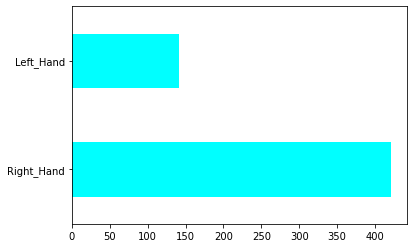

In [128]:
players['Batting_Hand'].value_counts().plot(kind='barh', color='cyan')

Date of Birth

In [129]:
from datetime import datetime, date

In [130]:
today = date.today()
print(today)

2022-12-08


In [131]:
today.year

2022

Calculating Age of players

In [132]:
players['DOB'][0].year

1991

In [133]:
age_1 = today.year - players['DOB'][0].year

In [134]:
age_1

31

In [135]:
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [136]:
players['Age'] = players['DOB'].apply(age)
players.head(6)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Age
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,31.0
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,39.0
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,45.0
3,A Choudhary,NaT,Right_Hand,Left-arm fast-medium,NaN,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN,NaN
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England,45.0


In [137]:
age_mean = (players['Age'].sum())/len(players['Age'])

In [138]:
age_mean = int(age_mean)

In [139]:
players['Age'].fillna(value = age_mean)

0      31.0
1      39.0
2      45.0
3      31.0
4      31.0
       ... 
561    45.0
562    32.0
563    40.0
564    38.0
565    44.0
Name: Age, Length: 566, dtype: float64

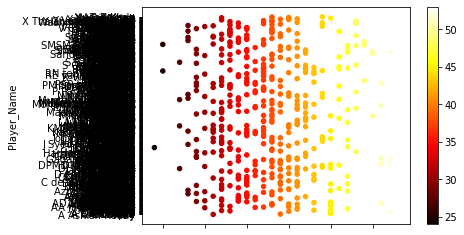

In [140]:
graph1 = players.plot.scatter(x='Age',y='Player_Name', c= players['Age'], cmap='hot', s=20)

## Deliveries Table

In [141]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [142]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [143]:
percent_missing_deliveries = deliveries.isnull().sum() * 100 / len(deliveries)
percent_missing_deliveries

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

## Matches Table

In [146]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [180]:
# Shape Of the Dataset
print('Shape of matches data',matches.shape)

Shape of matches data (756, 18)


In [144]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [181]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [145]:
percent_missing_matches = matches.isnull().sum() * 100 / len(matches)
percent_missing_matches

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

### Season Column

In [147]:
matches['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [157]:
matches['Season'] = matches['Season'].replace(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'] , ['10','1','2','3','4','5','6','7','8','9','11','12']
)

In [158]:
matches['Season'][75]

'1'

In [160]:
matches['Season'].value_counts()

6     76
5     74
4     73
3     60
7     60
9     60
11    60
12    60
10    59
8     59
1     58
2     57
Name: Season, dtype: int64

Matches per season

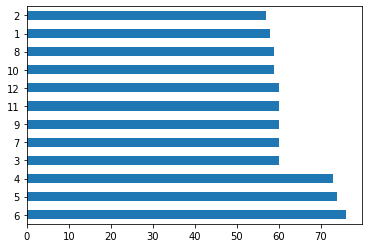

In [159]:
matches['Season'].value_counts().plot(kind='barh')

### City Column

In [165]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [170]:
matches.loc[matches['city'] == 'East London']

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
137,138,2,East London,01-05-2009,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,JP Duminy,Buffalo Park,M Erasmus,SK Tarapore,NaN
143,144,2,East London,04-05-2009,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,78,0,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,NaN
149,150,2,East London,08-05-2009,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN


In [174]:
matches1 = matches.copy()

Funtion to get Lat & Long from City

!pip install geocoder --quiet

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode("cityname")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

In [185]:
plt.figure(figsize=(18,9))

<Figure size 1296x648 with 0 Axes>

<Figure size 1296x648 with 0 Axes>

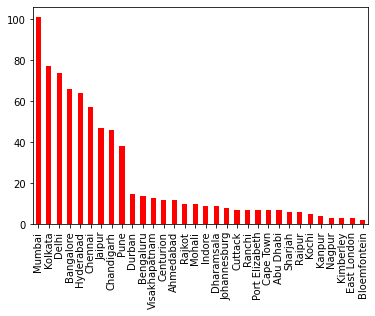

In [186]:
matches['city'].value_counts().plot(kind='bar', color = 'red')

### Match Column

Number of matches played in each IPL season

Text(0.5, 1.0, 'Number of matches played in each IPL season')

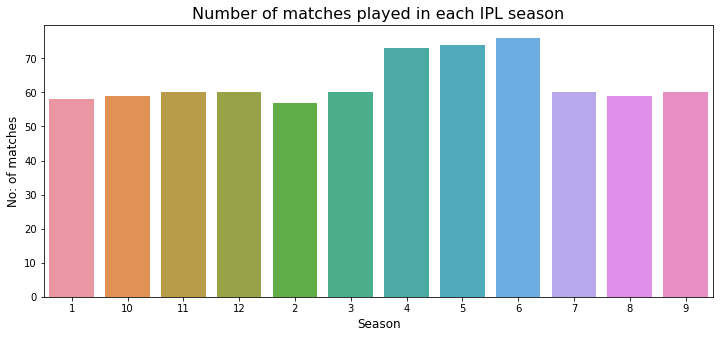

In [187]:
plt.figure(figsize=(12,5))
sns.countplot(x='Season',
              data=matches,
              order = matches['Season'].value_counts().index.sort_values()
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)

Most no of matches won by a team

Text(0.5, 1.0, 'Number of matches won by a team IPL')

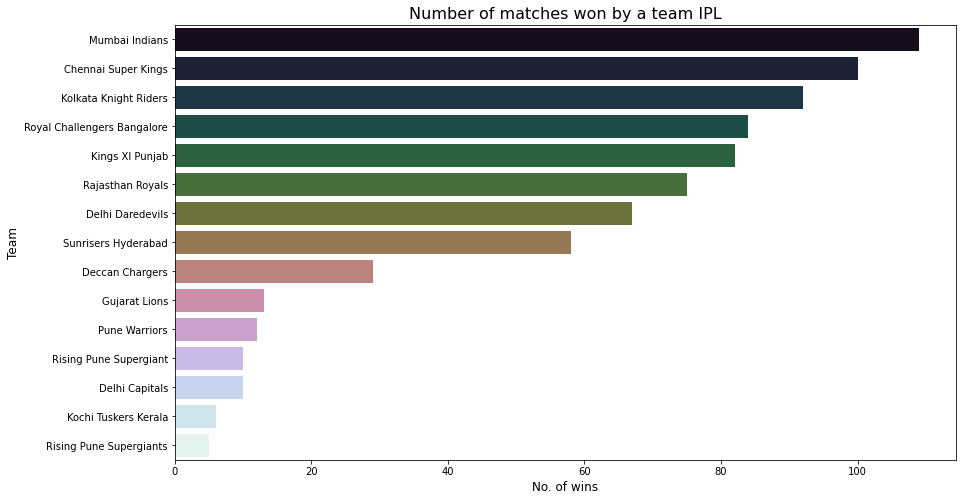

In [200]:
plt.figure(figsize=(14,8))
sns.countplot(y='winner',
              data=matches,
              order = matches['winner'].value_counts().index,
               palette = 'cubehelix'
              )
plt.xlabel('No. of wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Number of matches won by a team IPL',fontsize=16)

### Stadium Column

No of matches played in stadium

Text(0.5, 1.0, 'Number of matches played in a stadium in IPL')

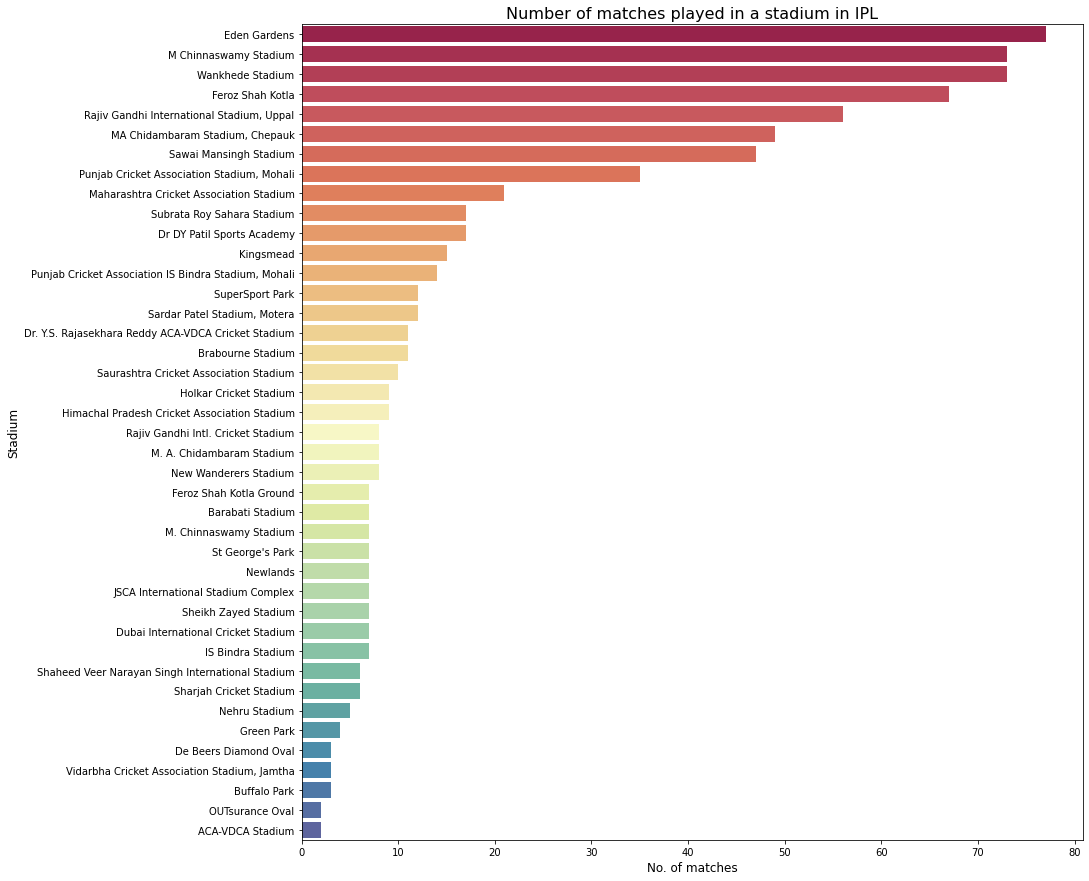

In [202]:
plt.figure(figsize=(14,15))
sns.countplot(y='venue',
              data=matches,
              order = matches['venue'].value_counts().index,
               palette = 'Spectral'
              )
plt.xlabel('No. of matches',fontsize=12)
plt.ylabel('Stadium',fontsize=12)
plt.title('Number of matches played in a stadium in IPL',fontsize=16)

### Toss Decisions

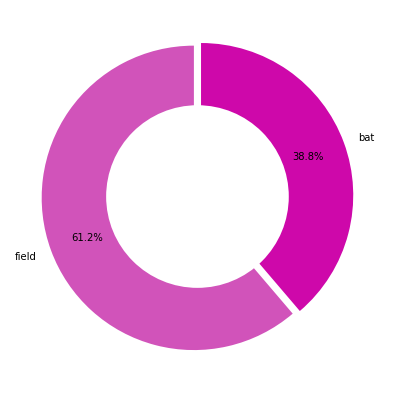

In [206]:
plt.figure(figsize=(7,7))
sizes = matches.toss_decision.value_counts()
labels = matches.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#D153BA','#CE08AA'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Toss Decision to field or bat in each IPL season

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

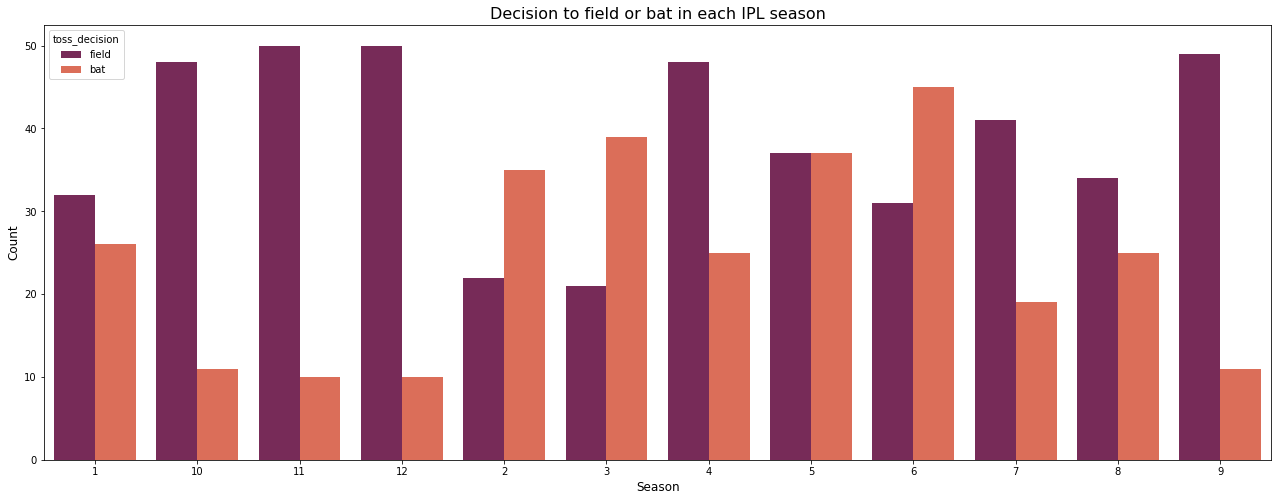

In [212]:
plt.figure(figsize=(22,8))
sns.countplot(x='Season',
              hue='toss_decision',
              data = matches,
              order = matches['Season'].value_counts().index.sort_values(),
              palette ='rocket')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)

### Player of the match

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count of Plyer of the match award')

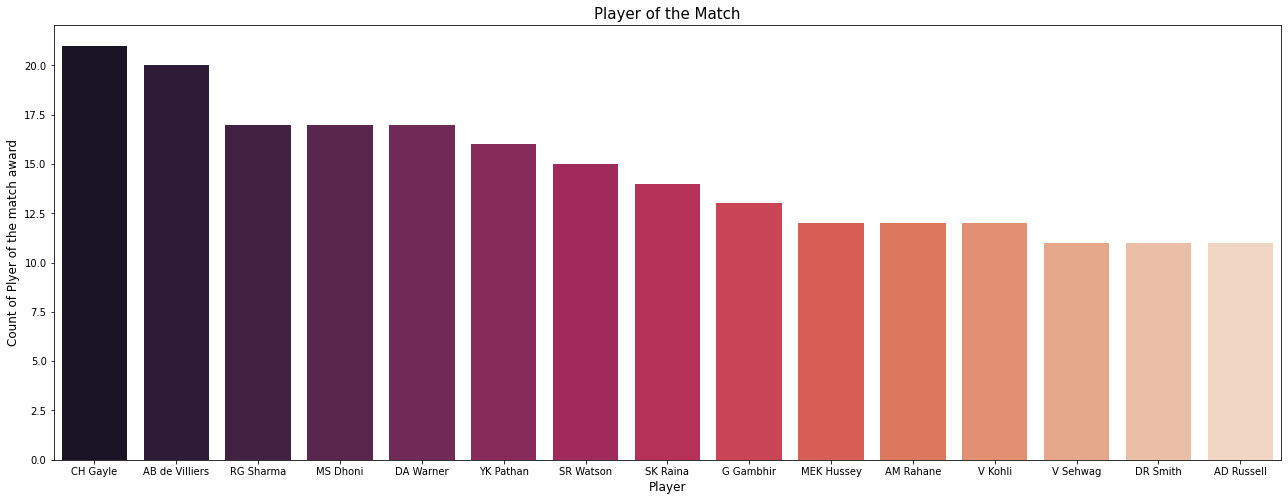

In [217]:
plt.figure(figsize=(22,8))

player_of_match = matches['player_of_match'].value_counts()[:15]
sns.barplot(player_of_match.index,
            player_of_match.values,
            palette='rocket')

plt.title("Player of the Match",fontsize=15)
plt.xlabel('Player',fontsize=12)
plt.ylabel('Count of Plyer of the match award',fontsize=12)

## Most Runs Average Strike Rate Table

In [218]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
